<a href="https://colab.research.google.com/github/raj-vijay/mv/blob/master/Image%20Processing/12_Image_Processing_Experiments_Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Corner Detection**

Corner detection is an approach used within computer vision systems to extract certain kinds of features and infer the contents of an image. Corner detection is frequently used in motion detection, image registration, video tracking, image mosaicing, panorama stitching, 3D reconstruction and object recognition. Corner detection overlaps with the topic of interest point detection.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
def show_image(image, title='Image', cmap_type='gray'):
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('on')
  plt.show()

In [0]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
  sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('Original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis('off')

**Function to display image with corners**

In [0]:
def show_image_with_corners(image, coords, title="Corners detected"):
  plt.imshow(image, interpolation='nearest', cmap='gray')
  plt.title(title)
  plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
  plt.axis('on')
  plt.show()

**Harris corner detector**

Harris Corner Detector is a corner detection operator that is commonly used in computer vision algorithms to extract corners and infer features of an image.

Harris corner detector takes the differential of the corner score into account with reference to direction directly, instead of using shifting patches for every 45 degree angles, and has been proved to be more accurate in distinguishing between edges and corners.

**Corners**

A corner is a point whose local neighborhood stands in two dominant and different edge directions. In other words, a corner can be interpreted as the junction of two edges, where an edge is a sudden change in image brightness.

Corners are the important features in the image, and they are generally termed as interest points which are invariant to translation, rotation and illumination. Although corners are only a small percentage of the image, they contain the most important features in restoring image information, and they can be used to minimize the amount of processed data for motion tracking, image stitching, building 2D mosaics, stereo vision, image representation and other related computer vision areas.

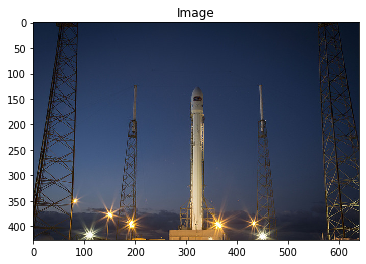

In [0]:
from skimage import data
image = data.rocket()
show_image(image)

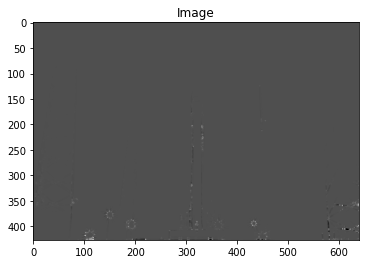

In [0]:
from skimage.feature import corner_harris
from skimage import color
# Convert image to grayscale
image = color.rgb2gray(image)
# Apply the Harris corner detector on the image
measure_image = corner_harris(image)
# Show the Harris response image
show_image(measure_image)

In [0]:
# Finds the coordinates of the corners
from skimage.feature import corner_peaks
coords = corner_peaks(corner_harris(image), min_distance=5)
print("A total of", len(coords), "corners were detected.")

A total of 31 corners were detected.


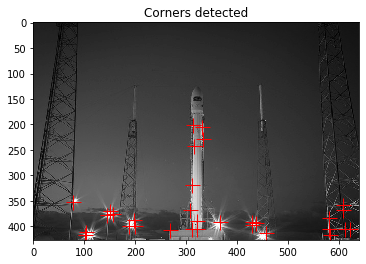

In [0]:
# Show image with marks in detected corners
show_image_with_corners(image, coords)

**Corner Detection for the Building Image**

In [0]:
# Load Image
!wget https://assets.datacamp.com/production/repositories/4470/datasets/4e1b6a178fd6d36488339a440959b4639cf54623/corners_building_top.jpg

--2020-03-11 22:05:05--  https://assets.datacamp.com/production/repositories/4470/datasets/4e1b6a178fd6d36488339a440959b4639cf54623/corners_building_top.jpg
Resolving assets.datacamp.com (assets.datacamp.com)... 54.230.161.99, 54.230.161.109, 54.230.161.102, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|54.230.161.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125280 (122K) [image/jpeg]
Saving to: ‘corners_building_top.jpg’

corners_building_to 100%[===================>] 122.34K  --.-KB/s    in 0.06s   

2020-03-11 22:05:05 (2.14 MB/s) - ‘corners_building_top.jpg’ saved [125280/125280]



In [0]:
building_image = plt.imread('corners_building_top.jpg')

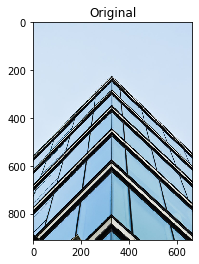

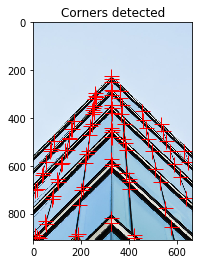

In [0]:
# Import the corner detector related functions and module
from skimage.feature  import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

With a min_distance setted to 2, we detect a total 98 corners in the image.
With a min_distance setted to 40, we detect a total 36 corners in the image.


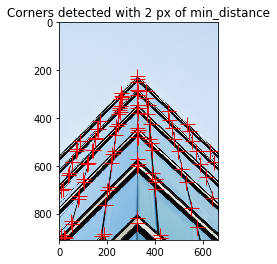

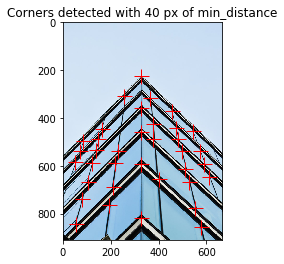

In [0]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance setted to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print("With a min_distance setted to 40, we detect a total", len(coords_w_min_40), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

*Personal notes on Image Processing with Python from Datacamp